# Internal Factors Analysis

---

## Import Libraries

In [1]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


---

## Load Datasets

### 1. `daily_dataset`

In [2]:
# Read data
df1 = pd.read_csv("Data/1. daily_dataset.csv")
df1.head()

,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
0,MAC000002,2012-10-12,0.1385,0.154304,0.886,46,0.196034,7.098,0.000
1,MAC000002,2012-10-13,0.1800,0.230979,0.933,48,0.192329,11.087,0.076
2,MAC000002,2012-10-14,0.1580,0.275479,1.085,48,0.274647,13.223,0.070
3,MAC000002,2012-10-15,0.1310,0.213688,1.164,48,0.224483,10.257,0.070
4,MAC000002,2012-10-16,0.1450,0.203521,0.991,48,0.184115,9.769,0.087


### 2. `halfhourly_dataset`

In [3]:
# Read data
df2 = pd.read_csv("Data/2. halfhourly_dataset.csv")
df2.head()

,LCLid,tstp,energy(kWh/hh)
0,MAC000002,2012-10-12 00:30:00.0000000,0
1,MAC000002,2012-10-12 01:00:00.0000000,0
2,MAC000002,2012-10-12 01:30:00.0000000,0
3,MAC000002,2012-10-12 02:00:00.0000000,0
4,MAC000002,2012-10-12 02:30:00.0000000,0


### 3. `hhblock_dataset`

In [4]:
# Read data
df3 = pd.read_csv("Data/3. hhblock_dataset.csv")
df3.head()

,LCLid,day,hh_0,hh_1,hh_2,hh_3,hh_4,hh_5,hh_6,hh_7,...,hh_38,hh_39,hh_40,hh_41,hh_42,hh_43,hh_44,hh_45,hh_46,hh_47
0,MAC000002,2012-10-13,0.263,0.269,0.275,0.256,0.211,0.136,0.161,0.119,...,0.918,0.278,0.267,0.239,0.230,0.233,0.235,0.188,0.259,0.250
1,MAC000002,2012-10-14,0.262,0.166,0.226,0.088,0.126,0.082,0.123,0.083,...,1.075,0.956,0.821,0.745,0.712,0.511,0.231,0.210,0.278,0.159
2,MAC000002,2012-10-15,0.192,0.097,0.141,0.083,0.132,0.070,0.130,0.074,...,1.164,0.249,0.225,0.258,0.260,0.334,0.299,0.236,0.241,0.237
3,MAC000002,2012-10-16,0.237,0.237,0.193,0.118,0.098,0.107,0.094,0.109,...,0.966,0.172,0.192,0.228,0.203,0.211,0.188,0.213,0.157,0.202
4,MAC000002,2012-10-17,0.157,0.211,0.155,0.169,0.101,0.117,0.084,0.118,...,0.223,0.075,0.230,0.208,0.265,0.377,0.327,0.277,0.288,0.256


### 4. `acorn_details.csv`

In [5]:
# Read data
df4 = pd.read_csv("Data/4. acorn_details.csv", encoding='ISO-8859-1')
df4.head()

,MAIN CATEGORIES,CATEGORIES,REFERENCE,ACORN-A,ACORN-B,ACORN-C,ACORN-D,ACORN-E,ACORN-F,ACORN-G,ACORN-H,ACORN-I,ACORN-J,ACORN-K,ACORN-L,ACORN-M,ACORN-N,ACORN-O,ACORN-P,ACORN-Q
0,POPULATION,Age,Age 0-4,77.0,83.0,72.0,100.0,120.0,77.0,97.0,97.0,63.0,119.0,67.0,114.0,113.0,89.0,123.0,138.0,133.0
1,POPULATION,Age,Age 5-17,117.0,109.0,87.0,69.0,94.0,95.0,102.0,106.0,67.0,95.0,64.0,108.0,116.0,86.0,89.0,136.0,106.0
2,POPULATION,Age,Age 18-24,64.0,73.0,67.0,107.0,100.0,71.0,83.0,89.0,62.0,104.0,459.0,97.0,96.0,86.0,117.0,109.0,110.0
3,POPULATION,Age,Age 25-34,52.0,63.0,62.0,197.0,151.0,66.0,90.0,88.0,63.0,132.0,145.0,109.0,96.0,90.0,140.0,120.0,120.0
4,POPULATION,Age,Age 35-49,102.0,105.0,91.0,124.0,118.0,93.0,102.0,103.0,76.0,111.0,67.0,99.0,98.0,90.0,102.0,103.0,100.0


### 5. `informations_households.csv`

In [6]:
# Read data
df5 = pd.read_csv("Data/6. informations_households.csv")
df5.head()

,LCLid,stdorToU,Acorn,Acorn_grouped,file
0,MAC005492,ToU,ACORN-,ACORN-,block_0
1,MAC001074,ToU,ACORN-,ACORN-,block_0
2,MAC000002,Std,ACORN-A,Affluent,block_0
3,MAC003613,Std,ACORN-A,Affluent,block_0
4,MAC003597,Std,ACORN-A,Affluent,block_0


### 10. `acorn_categories.xlsx`

In [7]:
# Read data
df10_1 = pd.read_excel("Data/10. acorn_categories.xlsx", sheet_name="Acorn Information")
df10_1.head()

,Acorn,Acorn Group Name,Acorn Category,Proportion of Acorn Category (%)
0,ACORN-A,Exclusive Addresses,Luxury Lifestyles,9
1,ACORN-B,Flourishing Capital,Luxury Lifestyles,33
2,ACORN-C,Upmarket Families,Luxury Lifestyles,57
3,ACORN-D,Commuter Belt Wealth,Established Affluence,75
4,ACORN-E,Prosperous Professionals,Established Affluence,25


In [8]:
# Read data
df10_2 = pd.read_excel("Data/10. acorn_categories.xlsx", sheet_name="Acorn Category Information")
df10_2.head()

,Acorn Category,Acorn Category Description,Number of UK Households,Proportion of UK (%),Predominant Housing Type,Predominant Housing Tenure,Savings & investments
0,Luxury Lifestyles,"The most affluent people in Britain, confident...",800000,3.0,Detached or apartments,Owned,Very high
1,Established Affluence,Wealthy and successful people living in large ...,3400000,11.9,Detached,Owned,High
2,Thriving Neighbourhoods,"Comfortable, stable families and empty nesters...",6300000,22.4,Semi or detached,Owned,Average
3,Steadfast Communities,This category contains much of middle of the r...,7300000,25.7,Semi detached,Privately rented,Below average
4,Stretched Society,Traditional working class areas of Britain con...,6000000,21.1,Teracced,Privately rented,Low


In [9]:
df10 = pd.merge(df10_1, df10_2, on="Acorn Category", how="left")
df10.head()

,Acorn,Acorn Group Name,Acorn Category,Proportion of Acorn Category (%),Acorn Category Description,Number of UK Households,Proportion of UK (%),Predominant Housing Type,Predominant Housing Tenure,Savings & investments
0,ACORN-A,Exclusive Addresses,Luxury Lifestyles,9,"The most affluent people in Britain, confident...",800000,3.0,Detached or apartments,Owned,Very high
1,ACORN-B,Flourishing Capital,Luxury Lifestyles,33,"The most affluent people in Britain, confident...",800000,3.0,Detached or apartments,Owned,Very high
2,ACORN-C,Upmarket Families,Luxury Lifestyles,57,"The most affluent people in Britain, confident...",800000,3.0,Detached or apartments,Owned,Very high
3,ACORN-D,Commuter Belt Wealth,Established Affluence,75,Wealthy and successful people living in large ...,3400000,11.9,Detached,Owned,High
4,ACORN-E,Prosperous Professionals,Established Affluence,25,Wealthy and successful people living in large ...,3400000,11.9,Detached,Owned,High


---

## Data Pre-Processing

### Convert Data Type

In [10]:
# Ensure 'day' is in datetime format in all DataFrames
df1['day'] = pd.to_datetime(df1['day'])
df2['tstp'] = pd.to_datetime(df2['tstp'])
df3['day'] = pd.to_datetime(df3['day'])

In [11]:
# Convert 'tstp' to datetime and extract the date in df2
df2['day'] = df2['tstp'].dt.date  # Extract date
df2['time'] = df2['tstp'].dt.time  # Extract time
df2.head()

,LCLid,tstp,energy(kWh/hh),day,time
0,MAC000002,2012-10-12 00:30:00,0,2012-10-12,00:30:00
1,MAC000002,2012-10-12 01:00:00,0,2012-10-12,01:00:00
2,MAC000002,2012-10-12 01:30:00,0,2012-10-12,01:30:00
3,MAC000002,2012-10-12 02:00:00,0,2012-10-12,02:00:00
4,MAC000002,2012-10-12 02:30:00,0,2012-10-12,02:30:00


In [12]:
# Convert 'energy(kWh/hh)' to numeric, ensuring errors are handled
df2['energy(kWh/hh)'] = pd.to_numeric(df2['energy(kWh/hh)'], errors='coerce')

### Transpose Data

In [13]:
# Transpose df4 to align demographic data with Acorn groups
df4_transpose = df4.set_index(['MAIN CATEGORIES', 'CATEGORIES', 'REFERENCE']).T.reset_index()
df4_transpose.rename(columns={'index': 'Acorn'}, inplace=True)
df4_transpose.head()

MAIN CATEGORIES    Acorn POPULATION                                         \
CATEGORIES                      Age                                          
REFERENCE                   Age 0-4 Age 5-17 Age 18-24 Age 25-34 Age 35-49   
0                ACORN-A       77.0    117.0      64.0      52.0     102.0   
1                ACORN-B       83.0    109.0      73.0      63.0     105.0   
2                ACORN-C       72.0     87.0      67.0      62.0      91.0   
3                ACORN-D      100.0     69.0     107.0     197.0     124.0   
4                ACORN-E      120.0     94.0     100.0     151.0     118.0   

MAIN CATEGORIES                                              ...  \
CATEGORIES                                        Geography  ...   
REFERENCE       Age 50-64 Aged 65-74 Aged 75 plus   England  ...   
0                   124.0      125.0        112.0     107.0  ...   
1                   121.0      120.0        103.0     101.0  ...   
2                   120.0      152.0        157.0     103.0  ...   
3                    72.0       55.0         49.0     114.0  ...   
4                    82.0       61.0         57.0     106.0  ...   

MAIN CATEGORIES             LEISURE TIME                         \
CATEGORIES      Holiday Destination/Type                          
REFERENCE                 Europe (other) USA / Canada Caribbean   
0                                  402.0       2280.0     133.0   
1                                  149.0        344.0     150.0   
2                                   85.0         79.0     150.0   
3                                  214.0         84.0     153.0   
4                                  171.0         56.0     128.0   

MAIN CATEGORIES                                         \
CATEGORIES                                               
REFERENCE       Australia / New Zealand  Africa   Asia   
0                                3795.0  2652.0  171.0   
1                                 116.0   126.0  137.0   
2                                 116.0    88.0   94.0   
3                                  58.0   424.0  220.0   
4                                  58.0   108.0  196.0   

MAIN CATEGORIES                                                         
CATEGORIES                                                              
REFERENCE       Activity / Outdoor Sports Cruise Package Self-catering  
0                                   298.0  272.0   196.0         308.0  
1                                   278.0  295.0   186.0         181.0  
2                                   138.0  272.0   166.0         181.0  
3                                   119.0   44.0    49.0          55.0  
4                                    93.0   44.0    49.0          55.0  

[5 rows x 827 columns]

---

## Merge Data

In [14]:
# Merge df1 & df5
merged_df1_df5 = pd.merge(df1, df5, on="LCLid", how="left")
merged_df1_df5.to_csv('Merged Data/1. merged_df1_df5.csv')
merged_df1_df5.head()

,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min,stdorToU,Acorn,Acorn_grouped,file
0,MAC000002,2012-10-12,0.1385,0.154304,0.886,46,0.196034,7.098,0.000,Std,ACORN-A,Affluent,block_0
1,MAC000002,2012-10-13,0.1800,0.230979,0.933,48,0.192329,11.087,0.076,Std,ACORN-A,Affluent,block_0
2,MAC000002,2012-10-14,0.1580,0.275479,1.085,48,0.274647,13.223,0.070,Std,ACORN-A,Affluent,block_0
3,MAC000002,2012-10-15,0.1310,0.213688,1.164,48,0.224483,10.257,0.070,Std,ACORN-A,Affluent,block_0
4,MAC000002,2012-10-16,0.1450,0.203521,0.991,48,0.184115,9.769,0.087,Std,ACORN-A,Affluent,block_0


In [15]:
# Merge on df10
merged_df1_df5_df10 = pd.merge(merged_df1_df5, df10, on="Acorn", how="left")
merged_df1_df5_df10.to_csv('Merged Data/2. merged_df1_df5_10.csv')
merged_df1_df5_df10.head()

,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min,stdorToU,...,file,Acorn Group Name,Acorn Category,Proportion of Acorn Category (%),Acorn Category Description,Number of UK Households,Proportion of UK (%),Predominant Housing Type,Predominant Housing Tenure,Savings & investments
0,MAC000002,2012-10-12,0.1385,0.154304,0.886,46,0.196034,7.098,0.000,Std,...,block_0,Exclusive Addresses,Luxury Lifestyles,9.0,"The most affluent people in Britain, confident...",800000.0,3.0,Detached or apartments,Owned,Very high
1,MAC000002,2012-10-13,0.1800,0.230979,0.933,48,0.192329,11.087,0.076,Std,...,block_0,Exclusive Addresses,Luxury Lifestyles,9.0,"The most affluent people in Britain, confident...",800000.0,3.0,Detached or apartments,Owned,Very high
2,MAC000002,2012-10-14,0.1580,0.275479,1.085,48,0.274647,13.223,0.070,Std,...,block_0,Exclusive Addresses,Luxury Lifestyles,9.0,"The most affluent people in Britain, confident...",800000.0,3.0,Detached or apartments,Owned,Very high
3,MAC000002,2012-10-15,0.1310,0.213688,1.164,48,0.224483,10.257,0.070,Std,...,block_0,Exclusive Addresses,Luxury Lifestyles,9.0,"The most affluent people in Britain, confident...",800000.0,3.0,Detached or apartments,Owned,Very high
4,MAC000002,2012-10-16,0.1450,0.203521,0.991,48,0.184115,9.769,0.087,Std,...,block_0,Exclusive Addresses,Luxury Lifestyles,9.0,"The most affluent people in Britain, confident...",800000.0,3.0,Detached or apartments,Owned,Very high


---

## Analyze Data

In [16]:
# Load the dataset
merged_df = pd.read_csv('Merged Data/2. merged_df1_df5_10.csv')
merged_df.head()

,Unnamed: 0,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min,...,file,Acorn Group Name,Acorn Category,Proportion of Acorn Category (%),Acorn Category Description,Number of UK Households,Proportion of UK (%),Predominant Housing Type,Predominant Housing Tenure,Savings & investments
0,0,MAC000002,2012-10-12,0.1385,0.154304,0.886,46,0.196034,7.098,0.000,...,block_0,Exclusive Addresses,Luxury Lifestyles,9.0,"The most affluent people in Britain, confident...",800000.0,3.0,Detached or apartments,Owned,Very high
1,1,MAC000002,2012-10-13,0.1800,0.230979,0.933,48,0.192329,11.087,0.076,...,block_0,Exclusive Addresses,Luxury Lifestyles,9.0,"The most affluent people in Britain, confident...",800000.0,3.0,Detached or apartments,Owned,Very high
2,2,MAC000002,2012-10-14,0.1580,0.275479,1.085,48,0.274647,13.223,0.070,...,block_0,Exclusive Addresses,Luxury Lifestyles,9.0,"The most affluent people in Britain, confident...",800000.0,3.0,Detached or apartments,Owned,Very high
3,3,MAC000002,2012-10-15,0.1310,0.213688,1.164,48,0.224483,10.257,0.070,...,block_0,Exclusive Addresses,Luxury Lifestyles,9.0,"The most affluent people in Britain, confident...",800000.0,3.0,Detached or apartments,Owned,Very high
4,4,MAC000002,2012-10-16,0.1450,0.203521,0.991,48,0.184115,9.769,0.087,...,block_0,Exclusive Addresses,Luxury Lifestyles,9.0,"The most affluent people in Britain, confident...",800000.0,3.0,Detached or apartments,Owned,Very high


In [17]:
# Information
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3510433 entries, 0 to 3510432
Data columns (total 23 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   Unnamed: 0                        int64  
 1   LCLid                             object 
 2   day                               object 
 3   energy_median                     float64
 4   energy_mean                       float64
 5   energy_max                        float64
 6   energy_count                      int64  
 7   energy_std                        float64
 8   energy_sum                        float64
 9   energy_min                        float64
 10  stdorToU                          object 
 11  Acorn                             object 
 12  Acorn_grouped                     object 
 13  file                              object 
 14  Acorn Group Name                  object 
 15  Acorn Category                    object 
 16  Proportion of Acorn Category (%)  fl

In [18]:
# Summary statistics
merged_df.describe()

,Unnamed: 0,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min,Proportion of Acorn Category (%),Number of UK Households,Proportion of UK (%)
count,3.510433e+06,3.510403e+06,3.510403e+06,3.510403e+06,3.510433e+06,3.499102e+06,3.510403e+06,3.510403e+06,3.509652e+06,3.509652e+06,3.509652e+06
mean,1.755216e+06,1.587395e-01,2.117305e-01,8.345210e-01,4.780364e+01,1.726673e-01,1.012414e+01,5.962578e-02,2.718096e+01,5.074763e+06,1.790704e+01
std,1.013375e+06,1.701865e-01,1.908460e-01,6.683156e-01,2.810982e+00,1.531208e-01,9.128793e+00,8.701312e-02,1.444853e+01,1.813836e+06,6.422540e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e+00,8.000000e+05,3.000000e+00
25%,8.776080e+05,6.700000e-02,9.808333e-02,3.460000e-01,4.800000e+01,6.911626e-02,4.682000e+00,2.000000e-02,2.300000e+01,3.400000e+06,1.190000e+01
50%,1.755216e+06,1.145000e-01,1.632917e-01,6.880000e-01,4.800000e+01,1.327910e-01,7.815000e+00,3.900000e-02,2.500000e+01,6.000000e+06,2.110000e+01
75%,2.632824e+06,1.910000e-01,2.624583e-01,1.128000e+00,4.800000e+01,2.293124e-01,1.256900e+01,7.100000e-02,3.100000e+01,6.300000e+06,2.240000e+01
max,3.510432e+06,6.970500e+00,6.928250e+00,1.076100e+01,4.800000e+01,4.024569e+00,3.325560e+02,6.524000e+00,7.500000e+01,7.300000e+06,2.570000e+01


In [19]:
# # Missing values
merged_df.isnull().sum()

Unnamed: 0                              0
LCLid                                   0
day                                     0
energy_median                          30
energy_mean                            30
energy_max                             30
energy_count                            0
energy_std                          11331
energy_sum                             30
energy_min                             30
stdorToU                                0
Acorn                                   0
Acorn_grouped                           0
file                                    0
Acorn Group Name                      781
Acorn Category                        781
Proportion of Acorn Category (%)      781
Acorn Category Description            781
Number of UK Households               781
Proportion of UK (%)                  781
Predominant Housing Type              781
Predominant Housing Tenure            781
Savings & investments                 781
dtype: int64

---

## Data Visualization

### Energy Consumption by Household Demographics
Compare total energy consumption (`energy_sum`) across different `Acorn` and `Acorn_grouped` categories.

##### By `Acorn`

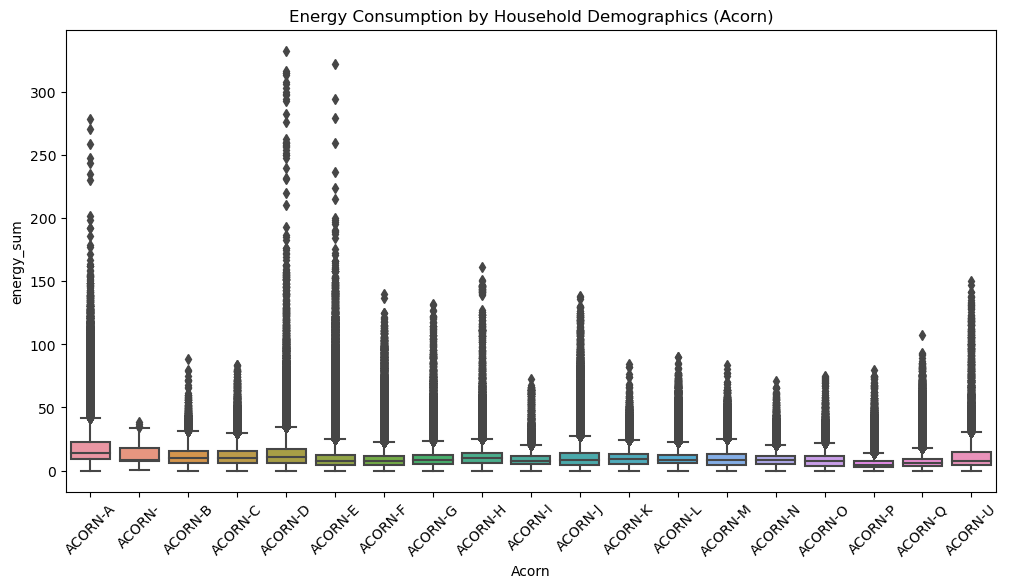

In [20]:
# [Boxplot] Energy consumption by Acorn category
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_df, x="Acorn", y="energy_sum")
plt.xticks(rotation=45)
plt.title("Energy Consumption by Household Demographics (Acorn)")
plt.show()

In [21]:
# Filter out rows where 'Acorn' equals 'ACORN-'
filtered_df = merged_df[merged_df['Acorn'] != 'ACORN-']

# Sort by energy_sum in descending order and get all categories
sorted_acorn = filtered_df.groupby('Acorn')['energy_sum'].sum().sort_values(ascending=False)

# Display the sorted categories
print("Acorn Categories Sorted by Energy Consumption (Top to Bottom):")
sorted_acorn

Acorn Categories Sorted by Energy Consumption (Top to Bottom):


Acorn
ACORN-E    1.058591e+07
ACORN-F    4.110611e+06
ACORN-Q    4.032837e+06
ACORN-H    2.992531e+06
ACORN-D    2.565846e+06
ACORN-L    2.045429e+06
ACORN-A    1.774523e+06
ACORN-G    1.257513e+06
ACORN-K    1.066916e+06
ACORN-C    1.059742e+06
ACORN-N    8.479862e+05
ACORN-J    7.359013e+05
ACORN-M    6.615990e+05
ACORN-O    5.223077e+05
ACORN-P    4.770790e+05
ACORN-U    3.433143e+05
ACORN-I    2.782335e+05
ACORN-B    1.721711e+05
Name: energy_sum, dtype: float64

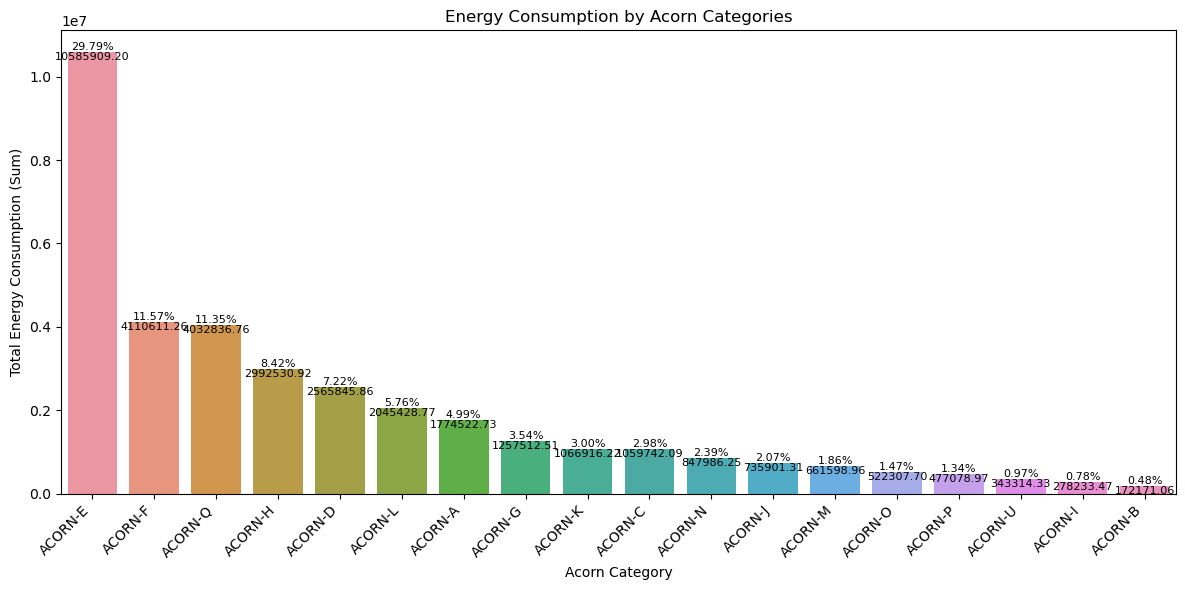

In [22]:
# Calculate the total energy consumption
total_energy_consumption = sorted_acorn.sum()

# Plot bar chart for energy consumption
plt.figure(figsize=(12, 6))  # Adjusted figure size for more space

# Plot the bar chart
sns.barplot(x=sorted_acorn.index, y=sorted_acorn.values)

# Add percentage and raw values on top and below the bars
for i, value in enumerate(sorted_acorn.values):
    percentage = (value / total_energy_consumption) * 100
    plt.text(i, value + 0.1, f'{percentage:.2f}%', ha='center', va='bottom', color='black', fontsize=8)
    plt.text(i, value - 0.1, f'{value:.2f}', ha='center', va='top', color='black', fontsize=8)

# Add title and labels
plt.title('Energy Consumption by Acorn Categories')
plt.xlabel('Acorn Category')
plt.ylabel('Total Energy Consumption (Sum)')

# Tilt x-axis labels, reduce font size and ensure they don't overlap
plt.xticks(rotation=45, ha='right', fontsize=10)

# Adjust layout to prevent label overlap
plt.tight_layout()

# Display the plot
plt.show()

In [23]:
# Sort by energy_sum in descending order
sorted_acorn = filtered_df.groupby('Acorn')['energy_sum'].sum().sort_values(ascending=False)

# List of sorted Acorn categories
sorted_acorn_categories = sorted_acorn.index.tolist()

# Combine the relevant columns for filtering
relevant_columns = ['MAIN CATEGORIES', 'CATEGORIES', 'REFERENCE'] + sorted_acorn_categories

# Check which of the required columns are present in df4
existing_columns = [col for col in relevant_columns if col in df4.columns]
missing_columns = [col for col in relevant_columns if col not in df4.columns]

# If there are any missing columns, print an error message
if missing_columns:
    print(f"The following Acorn categories are missing in df4: {', '.join(missing_columns)}")
else:
    print("All required columns are present.")

# If all required columns are present, filter and return the statistics
if existing_columns:
    relevant_statistics = df4[existing_columns]
    
    # Print nicely formatted statistics
    print("\nRelevant Statistics for Sorted Acorn Categories:")

    # Adjust column width and formatting
    pd.set_option('display.width', 1000)  # Set max width for display
    pd.set_option('display.max_columns', None)  # Display all columns
    pd.set_option('display.float_format', '{:,.2f}'.format)  # Format floats to two decimal places

# Return the relevant statistics as a DataFrame
relevant_statistics

The following Acorn categories are missing in df4: ACORN-U

Relevant Statistics for Sorted Acorn Categories:


,MAIN CATEGORIES,CATEGORIES,REFERENCE,ACORN-E,ACORN-F,ACORN-Q,ACORN-H,ACORN-D,ACORN-L,ACORN-A,ACORN-G,ACORN-K,ACORN-C,ACORN-N,ACORN-J,ACORN-M,ACORN-O,ACORN-P,ACORN-I,ACORN-B
0,POPULATION,Age,Age 0-4,120.00,77.00,133.00,97.00,100.00,114.00,77.00,97.00,67.00,72.00,89.00,119.00,113.00,123.00,138.00,63.00,83.00
1,POPULATION,Age,Age 5-17,94.00,95.00,106.00,106.00,69.00,108.00,117.00,102.00,64.00,87.00,86.00,95.00,116.00,89.00,136.00,67.00,109.00
2,POPULATION,Age,Age 18-24,100.00,71.00,110.00,89.00,107.00,97.00,64.00,83.00,459.00,67.00,86.00,104.00,96.00,117.00,109.00,62.00,73.00
3,POPULATION,Age,Age 25-34,151.00,66.00,120.00,88.00,197.00,109.00,52.00,90.00,145.00,62.00,90.00,132.00,96.00,140.00,120.00,63.00,63.00
4,POPULATION,Age,Age 35-49,118.00,93.00,100.00,103.00,124.00,99.00,102.00,102.00,67.00,91.00,90.00,111.00,98.00,102.00,103.00,76.00,105.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
821,LEISURE TIME,Holiday Destination/Type,Asia,196.00,69.00,63.00,95.00,220.00,73.00,171.00,122.00,124.00,94.00,49.00,97.00,57.00,96.00,113.00,72.00,137.00
822,LEISURE TIME,Holiday Destination/Type,Activity / Outdoor Sports,93.00,96.00,23.00,96.00,119.00,48.00,298.00,113.00,56.00,138.00,46.00,96.00,48.00,23.00,23.00,84.00,278.00
823,LEISURE TIME,Holiday Destination/Type,Cruise,44.00,70.00,49.00,70.00,44.00,28.00,272.00,70.00,28.00,272.00,28.00,70.00,28.00,49.00,49.00,70.00,295.00
824,LEISURE TIME,Holiday Destination/Type,Package,49.00,101.00,54.00,121.00,49.00,75.00,196.00,101.00,48.00,166.00,75.00,101.00,75.00,54.00,54.00,106.00,186.00


##### By `Acorn_grouped`

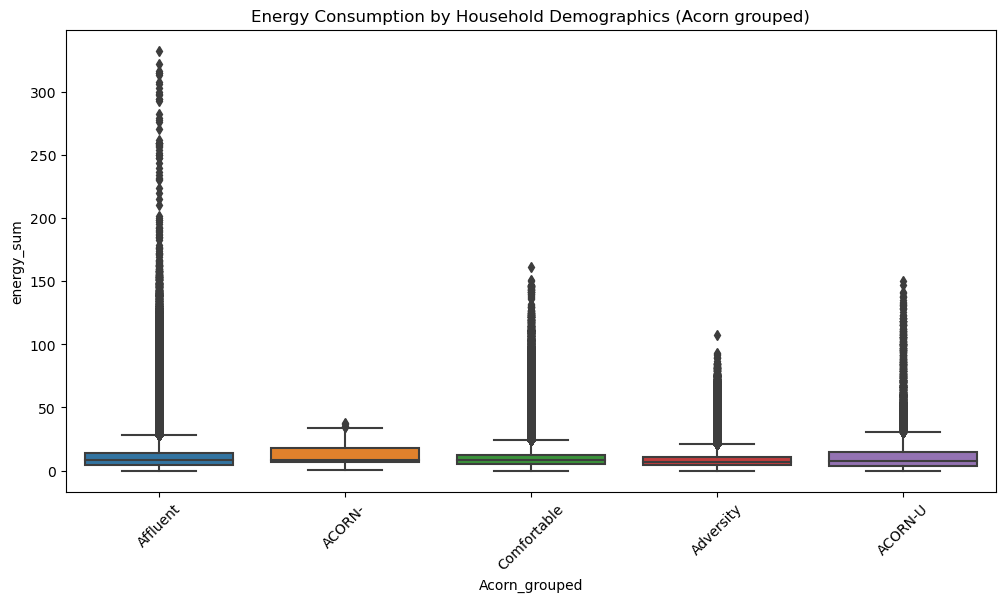

In [24]:
# [Boxplot] Energy consumption by Acorn_grouped
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_df, x="Acorn_grouped", y="energy_sum")
plt.xticks(rotation=45)
plt.title("Energy Consumption by Household Demographics (Acorn grouped)")
plt.show()

In [25]:
# Sort by energy_sum in descending order and get all groups
sorted_acorn_grouped = filtered_df.groupby('Acorn_grouped')['energy_sum'].sum().sort_values(ascending=False)

# Display the sorted grouped
print("Acorn grouped Sorted by Energy Consumption (Top to Bottom):")
sorted_acorn_grouped

Acorn grouped Sorted by Energy Consumption (Top to Bottom):


Acorn_grouped
Affluent      16,158,190.94
Adversity      9,654,153.61
Comfortable    9,374,789.47
ACORN-U          343,314.33
Name: energy_sum, dtype: float64

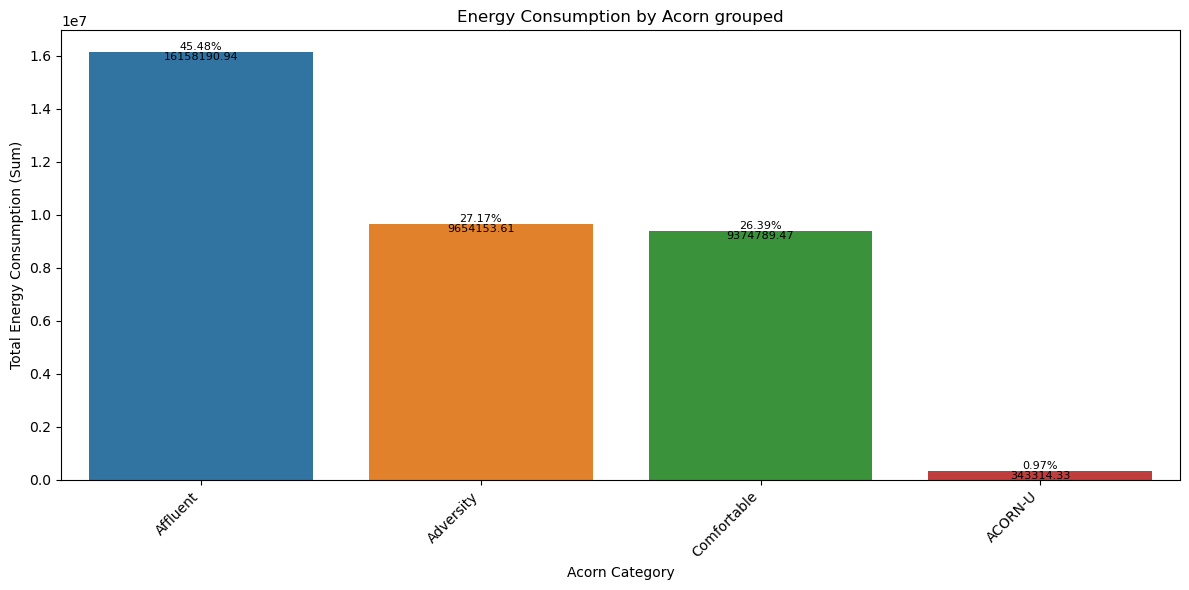

In [26]:
# Calculate the total energy consumption
total_energy_consumption = sorted_acorn_grouped.sum()

# Plot bar chart for energy consumption
plt.figure(figsize=(12, 6))  # Adjusted figure size for more space

# Plot the bar chart
sns.barplot(x=sorted_acorn_grouped.index, y=sorted_acorn_grouped.values)

# Add percentage and raw values on top and below the bars
for i, value in enumerate(sorted_acorn_grouped.values):
    percentage = (value / total_energy_consumption) * 100
    plt.text(i, value + 0.1, f'{percentage:.2f}%', ha='center', va='bottom', color='black', fontsize=8)
    plt.text(i, value - 0.1, f'{value:.2f}', ha='center', va='top', color='black', fontsize=8)

# Add title and labels
plt.title('Energy Consumption by Acorn grouped')
plt.xlabel('Acorn Category')
plt.ylabel('Total Energy Consumption (Sum)')

# Tilt x-axis labels, reduce font size and ensure they don't overlap
plt.xticks(rotation=45, ha='right', fontsize=10)

# Adjust layout to prevent label overlap
plt.tight_layout()

# Display the plot
plt.show()

##### By `Acorn Category`

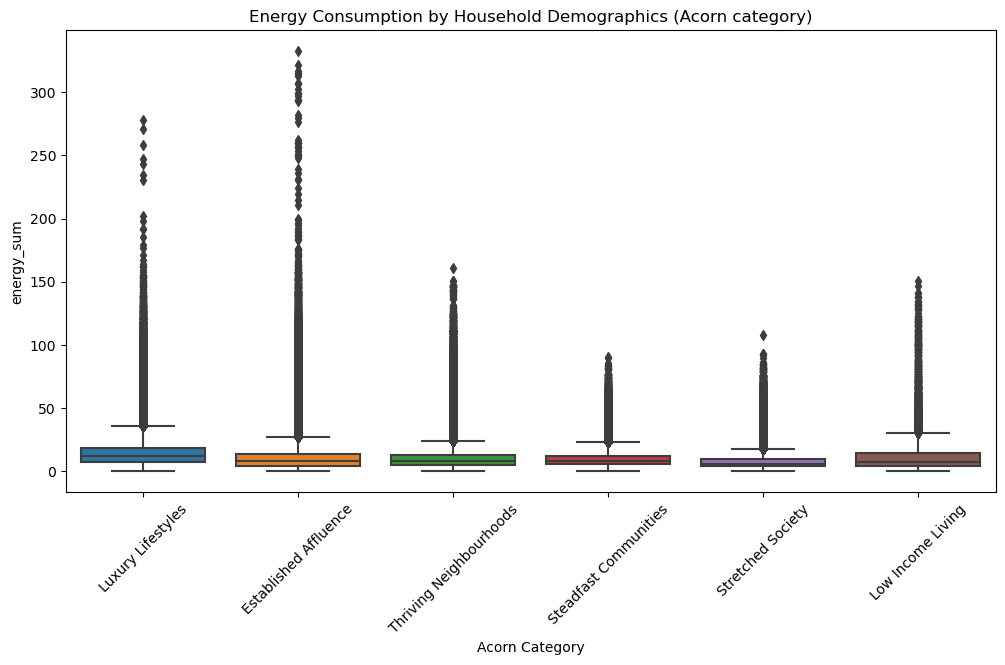

In [27]:
# [Boxplot] Energy consumption by Acorn category
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_df, x="Acorn Category", y="energy_sum")
plt.xticks(rotation=45)
plt.title("Energy Consumption by Household Demographics (Acorn category)")
plt.show()

In [28]:
# Sort by energy_sum in descending order and get all groups
sorted_acorn_category = filtered_df.groupby('Acorn Category')['energy_sum'].sum().sort_values(ascending=False)

# Display the sorted category
print("Acorn category Sorted by Energy Consumption (Top to Bottom):")
sorted_acorn_category

Acorn category Sorted by Energy Consumption (Top to Bottom):


Acorn Category
Established Affluence     13,151,755.06
Thriving Neighbourhoods    9,374,789.47
Steadfast Communities      5,144,237.88
Stretched Society          4,509,915.73
Luxury Lifestyles          3,006,435.88
Low Income Living            343,314.33
Name: energy_sum, dtype: float64

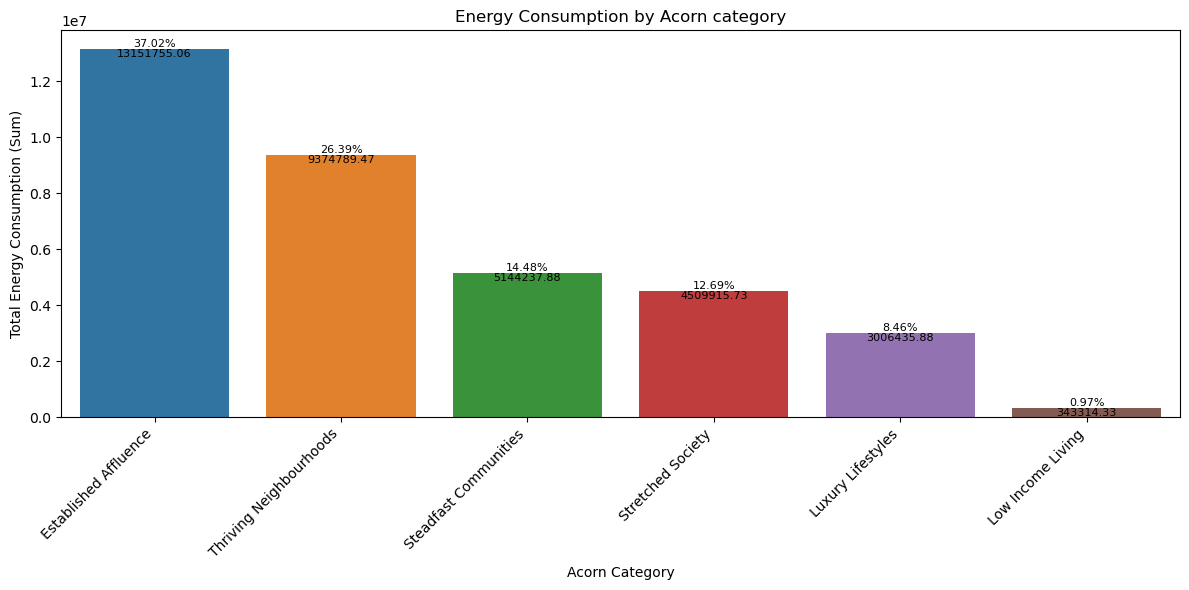

In [29]:
# Calculate the total energy consumption
total_energy_consumption = sorted_acorn_category.sum()

# Plot bar chart for energy consumption
plt.figure(figsize=(12, 6))  # Adjusted figure size for more space

# Plot the bar chart
sns.barplot(x=sorted_acorn_category.index, y=sorted_acorn_category.values)

# Add percentage and raw values on top and below the bars
for i, value in enumerate(sorted_acorn_category.values):
    percentage = (value / total_energy_consumption) * 100
    plt.text(i, value + 0.1, f'{percentage:.2f}%', ha='center', va='bottom', color='black', fontsize=8)
    plt.text(i, value - 0.1, f'{value:.2f}', ha='center', va='top', color='black', fontsize=8)

# Add title and labels
plt.title('Energy Consumption by Acorn category')
plt.xlabel('Acorn Category')
plt.ylabel('Total Energy Consumption (Sum)')

# Tilt x-axis labels, reduce font size and ensure they don't overlap
plt.xticks(rotation=45, ha='right', fontsize=10)

# Adjust layout to prevent label overlap
plt.tight_layout()

# Display the plot
plt.show()

---

### Effects of Tariffs on Energy Consumption
Compare `energy_sum` under Standard (Std) vs Time-of-Use (ToU) tariffs.

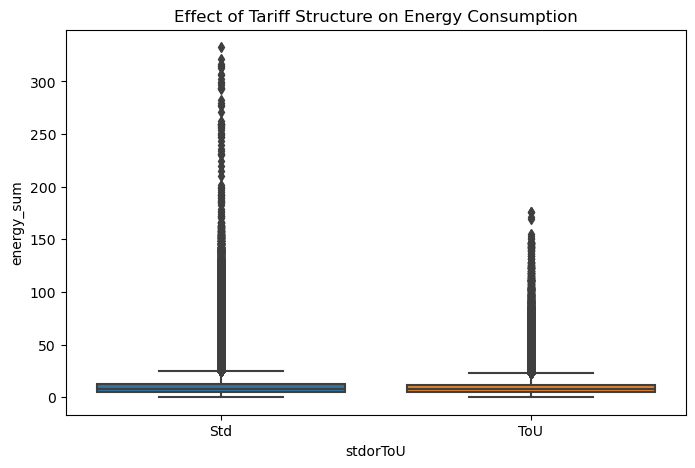

In [30]:
# [Boxplot] Energy consumption by tariff structures
plt.figure(figsize=(8, 5))
sns.boxplot(data=merged_df, x="stdorToU", y="energy_sum")
plt.title("Effect of Tariff Structure on Energy Consumption")
plt.show()